# Data Analysis
In this notebook I will examine the data I have collected from wikipedia. The big question I am answering is: <br>
### What are the most surprisingly successful colleges?
What colleges are the most attended by famous people in wikipedia history? Is that list what we expect?

## Part I: Colleges by Count
    In which I make a histogram plotting the top colleges by the number of people on wikipedia that attended that institution.

First, I load the datasets.

In [1]:
import numpy
import pandas
import re
from matplotlib import pyplot

In [2]:
wikipeople = pandas.read_csv('wikipeople_cleaned.csv')
wikipeople.set_index('name', inplace=True)
wikipeople.head()

,birth_date,occupation,education
name,,,
Alain Connes,1947,NaN,"['École Normale Supérieure', 'Pierre and Marie..."
Aldous Huxley,1894,{{hlist|writer|philosopher}},['Eton College']
Arthur Schopenhauer,1788,NaN,[]
Albert Einstein,1879,NaN,"['ETH Zurich|Federal Polytechnic School', 'Zur..."
Alfred Korzybski,1879,NaN,['Warsaw University of Technology']


In [3]:
tertiary_education = pandas.read_csv('tertiary_education.csv')
tertiary_education.head()

,school,count,notable_students
0,École Normale Supérieure,199,"['Alain Connes', 'André Weil', 'Henri Bergson'..."
1,Pierre and Marie Curie University,48,"['Alain Connes', 'Ahmad Motamedi', 'Pierre-Lou..."
2,Eton College,702,"['Aldous Huxley', 'A. J. Ayer', 'George Orwell..."
3,ETH Zurich|Federal Polytechnic School,1,['Albert Einstein']
4,Zurich,15,"['Albert Einstein', 'Claus Westermann', 'Annem..."


Now it's time to make the histogram.

In [4]:
# pyplot.hist(tertiary_education['count'])
# pyplot.show()

This last block of code gives us an error. We have too many data points. Let's try filtering out schools with at least 100 hits.

In [5]:
top_schools = tertiary_education[tertiary_education['count'] > 100]
top_schools.head()

,school,count,notable_students
0,École Normale Supérieure,199,"['Alain Connes', 'André Weil', 'Henri Bergson'..."
2,Eton College,702,"['Aldous Huxley', 'A. J. Ayer', 'George Orwell..."
5,University of Zurich,139,"['Albert Einstein', 'Wilhelm Röntgen', 'Rosa L..."
7,University of Edinburgh,1183,"['Alexander Graham Bell', 'David Hume', 'David..."
8,University College London,736,"['Alexander Graham Bell', 'Angela Vincent', 'J..."


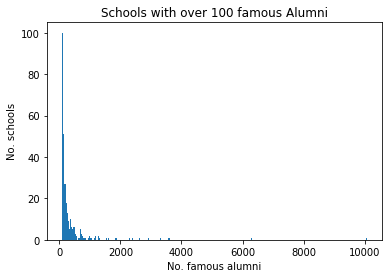

In [6]:
pyplot.hist(top_schools['count'], bins=536)
pyplot.title('Schools with over 100 famous Alumni')
pyplot.xlabel('No. famous alumni')
pyplot.ylabel('No. schools')
pyplot.show()

It looks like there are quite a lot of schools with 100 famous students, but a very long tail of schools with thousands of famous students. Why don't we break up top_schools by < 2000 students and > 2000 students to see what those histograms would look like.

In [7]:
top_schools_lower = top_schools[top_schools['count'] < 2000]
top_schools_lower.head()

,school,count,notable_students
0,École Normale Supérieure,199,"['Alain Connes', 'André Weil', 'Henri Bergson'..."
2,Eton College,702,"['Aldous Huxley', 'A. J. Ayer', 'George Orwell..."
5,University of Zurich,139,"['Albert Einstein', 'Wilhelm Röntgen', 'Rosa L..."
7,University of Edinburgh,1183,"['Alexander Graham Bell', 'David Hume', 'David..."
8,University College London,736,"['Alexander Graham Bell', 'Angela Vincent', 'J..."


In [8]:
top_schools_upper = top_schools[top_schools['count'] > 2000]
top_schools_upper.head()

,school,count,notable_students
15,Columbia University,3309,"['Allen Ginsberg', 'Arthur Jensen', 'Brian De ..."
64,Bachelor of Arts|BA,10061,"['Alan Turing', 'Alan Turing', 'Arnold Schwarz..."
65,Master of Arts|MA,2309,"['Alan Turing', 'Dana Rohrabacher', 'Dana Rohr..."
66,Princeton University,2240,"['Alan Turing', 'Brian Kernighan', 'Donald Rum..."
71,Harvard University,6289,"['Alexander Agassiz', 'Buckminster Fuller', 'B..."


There is that Bachelor of Arts and Master of Arts we were afraid of. Let's take that out of the data set.

In [9]:
temp_index = tertiary_education[tertiary_education['school'] == 'Bachelor of Arts|BA'].index
tertiary_education = tertiary_education.drop(index=temp_index)
temp_index = tertiary_education[tertiary_education['school'] == 'Master of Arts|MA'].index
tertiary_education = tertiary_education.drop(index=temp_index)
temp_index = tertiary_education[tertiary_education['school'] == 'Bachelor of Arts|B.A.'].index
tertiary_education = tertiary_education.drop(index=temp_index)
temp_index = tertiary_education[tertiary_education['school'] == 'Bachelor of Science|BS'].index
tertiary_education = tertiary_education.drop(index=temp_index)
temp_index = tertiary_education[tertiary_education['school'] == 'Juris Doctor|JD'].index
tertiary_education = tertiary_education.drop(index=temp_index)
temp_index = tertiary_education[tertiary_education['school'] == 'Juris Doctor|J.D.'].index
tertiary_education = tertiary_education.drop(index=temp_index)
tertiary_education.head()

,school,count,notable_students
0,École Normale Supérieure,199,"['Alain Connes', 'André Weil', 'Henri Bergson'..."
1,Pierre and Marie Curie University,48,"['Alain Connes', 'Ahmad Motamedi', 'Pierre-Lou..."
2,Eton College,702,"['Aldous Huxley', 'A. J. Ayer', 'George Orwell..."
3,ETH Zurich|Federal Polytechnic School,1,['Albert Einstein']
4,Zurich,15,"['Albert Einstein', 'Claus Westermann', 'Annem..."


Now let's re-run our code to create the smaller dataframe slices.

In [10]:
top_schools = tertiary_education[tertiary_education['count'] > 100]
top_schools_lower = top_schools[top_schools['count'] < 2000]
top_schools_upper = top_schools[top_schools['count'] > 2000]

In [11]:
len(top_schools_lower.index)

524

In [12]:
len(top_schools_upper.index)

6

### Histogram 1: Schools with between 100 and 2000 famous alumni

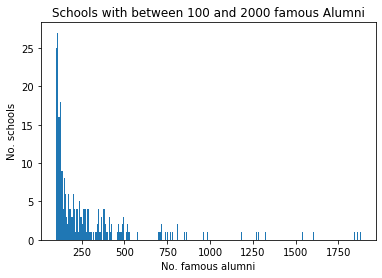

In [13]:
pyplot.hist(top_schools_lower['count'],bins=524)
pyplot.title('Schools with between 100 and 2000 famous Alumni')
pyplot.xlabel('No. famous alumni')
pyplot.ylabel('No. schools')
pyplot.show()

We see here a long tail with this slice of schools. This makes sense: as the counts of famous alumni goes up, there are less and less schools with that many hits.

In [14]:
top_schools.loc[top_schools['school'] == 'Cornell University']['count'].values[0]

1759

Cornell University is at the very tail end of this histogram.

### Histogram 2: Schools with over 2000 famous alumni

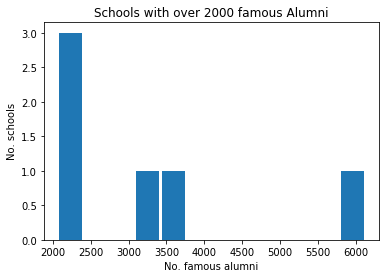

In [15]:
pyplot.hist(top_schools_upper['count'],bins=12, align='left', rwidth=0.9)
pyplot.title('Schools with over 2000 famous Alumni')
pyplot.xlabel('No. famous alumni')
pyplot.ylabel('No. schools')
pyplot.show()

The bins in this histogram are much wider, but we can see how there are some (5) schools with famous alumni counts in the 2000s to 4000s range. There is one school all the way out above 5500 notable alumni, far more successful than the other schools. I wonder what school that is.

In [16]:
top_schools_highest = top_schools_upper[top_schools_upper['count'] > 5000]
top_schools_highest['school']

71    Harvard University
Name: school, dtype: object

Ah. Of course it is.

## Part II: Top Ten Successful Colleges
    In which I examine the top ten colleges and compare to other methods of ranking.

First I would like to review top ten college lists from different sites.

From usnews.com we have the ranking:
   1. Princeton
   2. Harvard
   3. Columbia
   4. MIT
   5. Yale
   6. Stanford
   7. UChicago
   8. UPenn
   9. Northwestern
   10. Duke

In [17]:
usnews = ['Princeton', 'Harvard', 'Columbia', 'MIT', 'Yale', 'Stanford', 'UChicago', 'UPenn', 'Northwestern', 'Duke']

From forbes.com we have the ranking:
1. Harvard
2. Stanford
3. Yale
4. MIT
5. Princeton
6. UPenn
7. Brown
8. CalTech
9. Duke
10. Dartmouth

In [18]:
forbes = ['Harvard','Stanford','Yale','MIT','Princeton','UPenn','Brown','CalTech','Duke','Dartmouth']

From timeshighereducation.com we have the ranking:
1. Harvard
2. MIT
3. Yale
4. Columbia
5. CalTech
6. Stanford
7. Brown
8. Duke
9. Princeton
10. UPenn

In [19]:
times = ['Harvard','MIT','Yale','Columbia','CalTech','Stanford','Brown','Duke','Princeton','UPenn']

How similar will these rankings be with our top ten list?

Let's construct a master ranking list out of these three to compare with our list.

In [20]:
ranking = {'Princeton':0, 'Harvard':0, 'Columbia':0, 'MIT':0, 'Yale':0, 'Stanford':0, 'UChicago':0, 'UPenn':0, 'Northwestern':0, 'Duke':0, 'Brown':0, 'CalTech':0, 'Dartmouth':0}

In [21]:
for i in range(10):
    ranking[usnews[i]] = ranking[usnews[i]] + 10 - i
    ranking[forbes[i]] = ranking[forbes[i]] + 10 - i
    ranking[times[i]] = ranking[times[i]] + 10 - i
ranking

{'Princeton': 18,
 'Harvard': 29,
 'Columbia': 15,
 'MIT': 23,
 'Yale': 22,
 'Stanford': 19,
 'UChicago': 4,
 'UPenn': 9,
 'Northwestern': 2,
 'Duke': 6,
 'Brown': 8,
 'CalTech': 9,
 'Dartmouth': 1}

### Top Colleges ranking by popular online measures

In [22]:
aggregate_ranking = []
temp = 'Harvard'
while len(aggregate_ranking) < 10:
    for key, value in ranking.items():
        if value > ranking[temp]:
            temp = key
    aggregate_ranking.append(temp)
    ranking[temp] = 0
aggregate_ranking

['Harvard',
 'MIT',
 'Yale',
 'Stanford',
 'Princeton',
 'Columbia',
 'UPenn',
 'CalTech',
 'Brown',
 'Duke']

So this is our aggregate list based off the top online rankings. Now let's see what our model produces.

First, some guesses. As we've seen before, Harvard by far surpasses the other top schools. So the number 1 spot will at least be the same. Based on that, I think our list will be very similar. But there may be one or two shocking differences.

### Top Colleges ranking by greatest number of successful Alumni

In [23]:
top_ten = []
temp = ''
temp_count = 0
while len(top_ten) < 10:
    for ind in top_schools.index:
        school = top_schools['school'][ind]
        school_count = top_schools['count'][ind]
        if school in top_ten:
            continue
        elif school_count > temp_count:
            temp = school
            temp_count = school_count
    top_ten.append(temp)
    temp = ''
    temp_count = 0
top_ten

['Harvard University',
 'Yale University',
 'Columbia University',
 'Stanford University',
 'University of Michigan',
 'Princeton University',
 'University of Cambridge',
 'New York University',
 'University of Chicago',
 'Cornell University']

Let's compare:

In [24]:
print ('online ranking: ', aggregate_ranking)
print ('success ranking: ', top_ten)

online ranking:  ['Harvard', 'MIT', 'Yale', 'Stanford', 'Princeton', 'Columbia', 'UPenn', 'CalTech', 'Brown', 'Duke']
success ranking:  ['Harvard University', 'Yale University', 'Columbia University', 'Stanford University', 'University of Michigan', 'Princeton University', 'University of Cambridge', 'New York University', 'University of Chicago', 'Cornell University']


The top four look very similar: `Harvard`, `Yale`, `Columbia`, `Stanford`. <br>
But there are some interesting differences. Let's take a closer look.

`University of Cambridge` shows up in our list, but not in the other. Why is this? <br>
This one is simple. `Cambridge` is a European university while the other universities are all American. The online lists do not classify international institutions, although it looks like perhaps that wouldn't make a world of difference in the rankings. That being said, `Cambridge` is simply one of the world's top colleges that happens to be in another country. 

`New York University` made its way onto our list. While not one of the top top colleges by other rankings, NYU is a very good school and clearly is better than many of the ivies by our metric. This is a surprisingly successful school!

`Cornell University` snuck onto our list. In the other online rankings it usually lands at 11 or 12, but here it was just able to make it on. Yay!

`University of Michigan` is on our list. Now, this is a really interesting one. While considered a good school, `UMichigan` is usually not considered one of the best schools in the world. But it is number *5* on our list. UMichigan beats Princeton, Cambridge, and UChicago! This is one of the most successful colleges in the world!

Why is UMichigan so successful? Well it has one of the best theatre programs in the world, and there are more people from UMichigan on Broadway on any other school. Acting is perhaps the sector that comes with the most fame – and I suspect a disproportionately large portion of wikipeople are actors and actresses. This could also explain why NYU shows up on the most successful list. Regardless, if you want fame and a wikipedia page of your own, UMichigan might be the way to get there!

### Works Cited
    https://www.usnews.com/best-colleges/rankings/national-universities
    https://www.forbes.com/top-colleges/#640482791987
    https://www.timeshighereducation.com/rankings/united-states/2019#!/page/0/length/25/sort_by/rank/sort_order/asc/cols/stats

## Part III: Which of the Top Ten are getting more successful?
    In which I graph how successful each of the top ten colleges has been over the past seventy years.

In [25]:
years = [1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020]

In [26]:
# harvard_success = []
# for year in years:
#     count = 0
#     for alumni in top_schools[top_schools['school']=='Harvard University']['notable_students']:
#         for alumnus in alumni:
#             print(alumnus)
#             if wikipeople[alumnus]['birth_date'] <= year:
#                 count += 1
#     harvard_success.append(count)
# harvard_success

This gives a strange error. It looks like once again when loading my csv pandas has misinterpreted the education field as a string rather than an array.

In [27]:
def string_to_array(thing):
    # if it is already an array, return
    if isinstance(thing, list):
        return thing
    # else turn it into an array
    array = []
    while len(thing) > 2:
        temp = ' '
        r = re.search('\'([^,]*)\'', thing)
        if r:
            temp = r.group(1)
            array.append(temp)
        else:
            return array
        thing = thing[len(temp)+4:]
    return array

In [28]:
tertiary_education['notable_students'] = [ string_to_array(alumnus) for alumnus in tertiary_education['notable_students'] ]

Let's try again.

In [29]:
tertiary_education.set_index('school',inplace=True)

In [30]:
harvard_success = []
for year in years:
    count = 0
    for alumnus in tertiary_education['notable_students']['Harvard University']:
        if wikipeople.loc[alumnus]['birth_date'] + 22 <= year: # + 22 because there is an estimated 22 years between a notable alumni's birth and their college graduation
            count += 1
    harvard_success.append(count)
harvard_success

[2720,
 2972,
 3253,
 3655,
 4038,
 4448,
 4840,
 5184,
 5498,
 5767,
 5962,
 6097,
 6157,
 6179,
 6196]

Success. Now let's make an array with the success rates for all schools by year.

In [31]:
i = 0
schools_success_by_years = []
while (i < 10):
    school = top_ten[i]
    temp_success = []
    for year in years:
        count = 0
        for alumnus in tertiary_education['notable_students'][school]:
            if alumnus == ' Nyong':
                # there was some weird error with ' Nyong' we needed to get around;
                # this was probably actress Lupita Nyong'o whose apostrophe threw a wrench into the converstion from string to array
                alumnus = 'Lupita Nyong\'o'
            elif wikipeople.loc[alumnus]['birth_date'] + 22 <= year: 
                # + 22 because there is an estimated 22 years between a notable alumni's birth and their college graduation
                count += 1
        temp_success.append(count)
    schools_success_by_years.append(temp_success)
    i += 1

A quick aside on the following data:<br><br>
We will be plotting, for each college, year versus success. Let me briefly explain exactly what the success metric is.<br>
The success metric is determined by the number of famous people attending that school that had graduated by that year. Graduation year is a rough estimation based on birth year + 22. Something to note is that at the time denoted, or at each given year, the school's number of successful people is less than our success metric. This is because people who just graduated were not famous yet and would not be famous for a while yet. But at that year, the success metric is the potential fame of all the alumni.<br><br>
One last note: in this project I have basically used fame and success interchangeably. These two metrics are related, but not exactly the same. Still, I think marginal fame is a good stand-in measure for success (keep in mind that the level of fame needed to get onto wikipedia is nowhere near the level of fame needed to be a celebrity).

In [32]:
colors = ['blue','green','red','cyan','magenta','black','teal','lime','orange','brown']

### Success of Top Ten Schools by Year

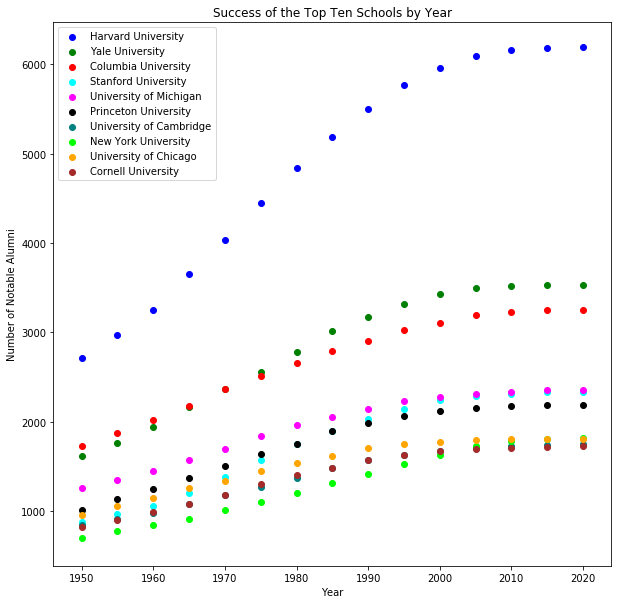

In [33]:
pyplot.figure(figsize=(10,10))
for i in range(10):
    pyplot.scatter(years, schools_success_by_years[i],color=colors[i], label=top_ten[i])
pyplot.legend()
pyplot.xlabel('Year')
pyplot.ylabel('Number of Notable Alumni')
pyplot.title('Success of the Top Ten Schools by Year')
pyplot.show()

All the schools seem to have a similar shaped curve over the last 70 years. Yale butted its way ahead of Columbia around 1970 and NYU made a quick rise around 2000, but overall all ten of the colleges seem to be growing at a similar pace. Interestingly, about the year 1990 it looks like the growth turned concave down rather than concave up.

I think it is worth noting that not only does Harvard have twice as many notable alumni as its next-in-line competitors Yale and Columbia, but the number of notable alumni Harvard had in *1950* is about equal to have many notable alumni Yale and Columbia have *now*. By this metric, Harvard is the best college far and away. It's not even in the same league as the other nine institutions.

But which of these schools has the steepest *rate of increase* in notable alumni? We can estimate this by making Linear Regressions of the ten top colleges and seeing which college's overall trend has the steepest slope.

### Institutions' Increasing Rate of Success

By eyeballing the graph, it looks to me like Harvard and Yale will have the steepest slopes. We shall see.

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
def regression_coef(x, y):
    x = numpy.array(x).reshape(-1, 1)
    model = LinearRegression().fit(x, y)
    return model.coef_[0]

In [36]:
for i in range(10):
    coef = regression_coef(years,schools_success_by_years[i])
    print(top_ten[i],': ',coef)

Harvard University :  54.95000000000001
Yale University :  30.270714285714284
Columbia University :  23.248571428571424
Stanford University :  23.49142857142857
University of Michigan :  16.955000000000002
Princeton University :  18.040714285714284
University of Cambridge :  14.285714285714286
New York University :  17.762857142857143
University of Chicago :  12.804285714285713
Cornell University :  13.97642857142857


Yes indeed, Harvard once again tops the list with a slope of 55. As we predicted, Yale is next. More or less, the rate of increase follows the ranking of top schools, with a couple of schools slightly ahead or behind of what their ranking would suggest.

### Wrap-Up

In conclusion, we have our top ten schools listed above, built through counts of alumni pages on wikipedia.

**Where is our model weak?** <br><br>
Well as mentioned before, the nature of what we are measuring might give some advantage to certain occupations – being in the theatre/television business is more likely to land you a wikipedia page. Still, I think it is a fair measure of the overall success of a given school. <br>
Also, our list is rather similar to the aggregate list created at the beginning of this notebook. That tells me there really is a correlation between being the 'best school' and have the most notable alumni.<br><br>
One other weakness in our model is the disorganization of information on wikipedia. Because of this disorganizing I was unable to use *occupation* data effectively, something that would have been really interesting to see. On top of that, we may have missed a bunch of hits for some schools if their name was inputted differently. For instance, there are 9 hits for *Cornell* in the data set. Is this Cornell University? It is hard to tell.<br><br>
For the most part, I do not think these mislabelings have impacted the data set much given how large the data set is (9 more hits for *Cornell University* wasn't going to bring us above UChicago). But one school it may have significantly affected is Oxford University– oftentimes alumni of Oxford list their college within Oxford as their alma mater rather than Oxford itself. Perhaps if the data was more organized Oxford would have made it into the top ten list. <br><br>
However, then Cornell would have been bumped off so maybe this disorganized data isn't all bad.

**Where is our model strong?** <br><br>
Well, we identified pretty conclusively that Harvard is by far the strongest college in terms of notable alumni. I think this data certainly corroborates the lists we downloaded at the beginning of this notebook that place Harvard at the top of tertiary education institutions.<br><br>
I also think that getting UMichigan and NYU on our list is pretty significant – while they are often considered good schools they are rarely ranked in the very top ten. Is that something that might change? Certainly we have shown that these two schools have had their fair share of success. And the rate of increase for both schools seems to be on par with the ivies around them.

In [37]:
# Finally let's save some of our data in csv files to be accessable in other notebooks
tertiary_education.to_csv('tertiary_education_filtered.csv',index=True)
# Other data needed for other files: aggregate_ranking, top_ten, years, schools_success_by_years
#              top_schools, top_schools_lower, top_schools_upper